In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import DBSCAN

# 1. Read the edge list and build the graph
edges = []
with open('p2p-Gnutella08.txt') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        u, v = map(int, line.strip().split())
        edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# 2. List of nodes (for consistent ordering)
nodes = list(G.nodes())
node_idx = {node: idx for idx, node in enumerate(nodes)}

# 3. Compute shortest-path distance matrix
N = len(nodes)
dist_matrix = np.full((N, N), np.inf)
np.fill_diagonal(dist_matrix, 0)

for source in nodes:
    lengths = nx.single_source_shortest_path_length(G, source, cutoff=5)  # cutoff limits computation for large graphs
    for target, d in lengths.items():
        i, j = node_idx[source], node_idx[target]
        dist_matrix[i, j] = d

# 4. Run DBSCAN on the distance matrix
# Choose eps and min_samples based on your requirements
eps = 2  # max path length to be considered "neighbors"
min_samples = 4

db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
labels = db.fit_predict(dist_matrix)

# 5. Output: node ID and its cluster label
for node, label in zip(nodes, labels):
    print(f'Node {node}: Cluster {label}')


ValueError: Input X contains infinity or a value too large for dtype('float64').

In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import DBSCAN

# 1. Read the edge list and build the graph
edges = []
with open('p2p-Gnutella08.txt') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        u, v = map(int, line.strip().split())
        edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# 2. List of nodes (for consistent ordering)
nodes = list(G.nodes())
node_idx = {node: idx for idx, node in enumerate(nodes)}

# 3. Compute shortest-path distance matrix
N = len(nodes)
dist_matrix = np.full((N, N), np.inf)
np.fill_diagonal(dist_matrix, 0)

for source in nodes:
    lengths = nx.single_source_shortest_path_length(G, source, cutoff=5)  # cutoff limits computation for large graphs
    for target, d in lengths.items():
        i, j = node_idx[source], node_idx[target]
        dist_matrix[i, j] = d

# 4. Handle infinite distances before running DBSCAN
# Replace inf values with a large number (e.g., eps + 1 or a sufficiently large value)
# Nodes with distance > eps are not considered neighbors anyway.
eps = 2  # max path length to be considered "neighbors"
min_samples = 4

# Replace infinite values with a value larger than eps
dist_matrix[dist_matrix == np.inf] = eps + 1

# 5. Run DBSCAN on the distance matrix
db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
labels = db.fit_predict(dist_matrix)

# 6. Output: node ID and its cluster label
for node, label in zip(nodes, labels):
    print(f'Node {node}: Cluster {label}')

Node 0: Cluster 0
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 0
Node 6: Cluster 0
Node 7: Cluster 0
Node 8: Cluster 0
Node 9: Cluster 0
Node 10: Cluster 0
Node 703: Cluster 0
Node 826: Cluster 0
Node 1097: Cluster 0
Node 1287: Cluster 0
Node 1591: Cluster 0
Node 1895: Cluster 0
Node 1896: Cluster 0
Node 1897: Cluster 0
Node 1898: Cluster 0
Node 1899: Cluster 0
Node 144: Cluster 0
Node 258: Cluster 0
Node 491: Cluster 0
Node 1021: Cluster 0
Node 1418: Cluster 0
Node 1669: Cluster 0
Node 1900: Cluster 0
Node 1901: Cluster 0
Node 1902: Cluster 0
Node 1903: Cluster 0
Node 121: Cluster 0
Node 127: Cluster 0
Node 128: Cluster 0
Node 179: Cluster 0
Node 247: Cluster 0
Node 249: Cluster 0
Node 264: Cluster 0
Node 353: Cluster 0
Node 424: Cluster 0
Node 426: Cluster 0
Node 145: Cluster 0
Node 176: Cluster 0
Node 177: Cluster 0
Node 753: Cluster 0
Node 754: Cluster 0
Node 762: Cluster 0
Node 2064: Cluster 0
Node 3002: Cluster 0
Node 520: Cluster 0
Node

Minimum finite non-zero distance: 1.0
Maximum finite distance: 9.0
Median finite distance: 5.0
Mean finite distance: 4.642991785658397


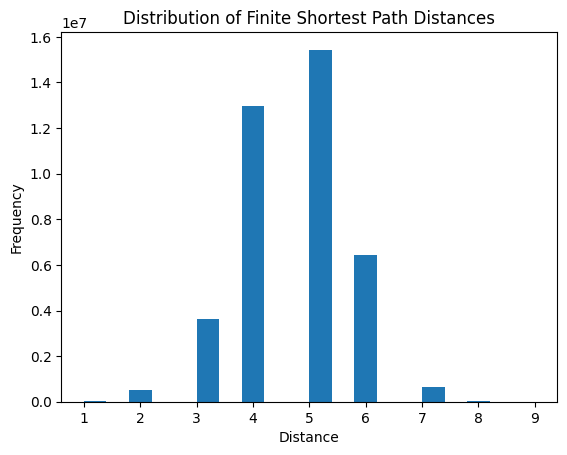


Cluster Labels:
Node 0: Cluster 0
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 0
Node 6: Cluster 0
Node 7: Cluster 0
Node 8: Cluster 0
Node 9: Cluster 0
Node 10: Cluster 0
Node 703: Cluster 0
Node 826: Cluster 0
Node 1097: Cluster 0
Node 1287: Cluster 0
Node 1591: Cluster 0
Node 1895: Cluster 0
Node 1896: Cluster 0
Node 1897: Cluster 0
Node 1898: Cluster 0
Node 1899: Cluster 0
Node 144: Cluster 0
Node 258: Cluster 0
Node 491: Cluster 0
Node 1021: Cluster 0
Node 1418: Cluster 0
Node 1669: Cluster 0
Node 1900: Cluster 0
Node 1901: Cluster 0
Node 1902: Cluster 0
Node 1903: Cluster 0
Node 121: Cluster 0
Node 127: Cluster 0
Node 128: Cluster 0
Node 179: Cluster 0
Node 247: Cluster 0
Node 249: Cluster 0
Node 264: Cluster 0
Node 353: Cluster 0
Node 424: Cluster 0
Node 426: Cluster 0
Node 145: Cluster 0
Node 176: Cluster 0
Node 177: Cluster 0
Node 753: Cluster 0
Node 754: Cluster 0
Node 762: Cluster 0
Node 2064: Cluster 0
Node 3002: Cluster 0
Node 52

In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt # Import matplotlib

# 1. Read the edge list and build the graph
edges = []
with open('p2p-Gnutella08.txt') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        u, v = map(int, line.strip().split())
        edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# 2. List of nodes (for consistent ordering)
nodes = list(G.nodes())
node_idx = {node: idx for idx, node in enumerate(nodes)}

# 3. Compute shortest-path distance matrix
N = len(nodes)
dist_matrix = np.full((N, N), np.inf)
np.fill_diagonal(dist_matrix, 0)

for source in nodes:
    # Increased cutoff to capture potentially larger components
    lengths = nx.single_source_shortest_path_length(G, source, cutoff=10)
    for target, d in lengths.items():
        i, j = node_idx[source], node_idx[target]
        dist_matrix[i, j] = d

# 4. Handle infinite distances before running DBSCAN
eps = 2  # Initial eps
min_samples = 4 # Initial min_samples

# --- Added Inspection Step ---
# Analyze the distribution of finite distances
finite_distances = dist_matrix[np.isfinite(dist_matrix) & (dist_matrix > 0)]
print(f"Minimum finite non-zero distance: {np.min(finite_distances)}")
print(f"Maximum finite distance: {np.max(finite_distances)}")
print(f"Median finite distance: {np.median(finite_distances)}")
print(f"Mean finite distance: {np.mean(finite_distances)}")

# Optional: Plot histogram of finite distances to help choose eps
plt.hist(finite_distances, bins=20)
plt.title("Distribution of Finite Shortest Path Distances")
plt.xlabel("Distance")
plt.ylabel("Frequency")
plt.show()
# -----------------------------

# Replace infinite values with a value larger than the initial eps
# This value should ideally be larger than any meaningful shortest path distance you expect to see.
# Using a value significantly larger than the maximum finite distance found might be better
large_distance = np.max(finite_distances) + 1 if finite_distances.size > 0 else eps + 1
dist_matrix[dist_matrix == np.inf] = large_distance


# 5. Run DBSCAN on the distance matrix
# You might need to adjust eps and min_samples based on the analysis above and desired cluster properties
# Example: Trying a larger eps might connect more nodes
# eps = 5
# min_samples = 10

db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
labels = db.fit_predict(dist_matrix)

# 6. Output: node ID and its cluster label
print("\nCluster Labels:")
for node, label in zip(nodes, labels):
    print(f'Node {node}: Cluster {label}')

# Optional: Print the number of nodes in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)
print("\nCluster Sizes:")
for label, count in zip(unique_labels, counts):
    if label == -1:
        print(f"Noise (-1): {count} nodes")
    else:
        print(f"Cluster {label}: {count} nodes")

Number of nodes in the graph: 6301
Number of edges in the graph: 20777
Number of connected components: 2
Sizes of connected components (largest first): [6299, 2]

Finite Shortest Path Distance Statistics:
Minimum finite non-zero distance: 1.0
Maximum finite distance: 9.0
Median finite distance: 5.0
Mean finite distance: 4.642991785658397


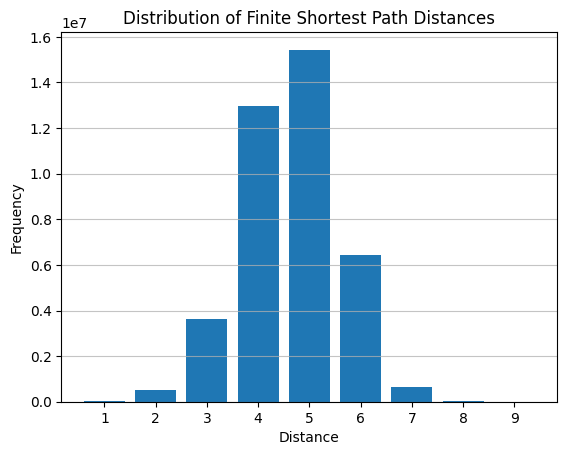


Running DBSCAN with eps=2, min_samples=4

Cluster Labels (sample):
Node 0: Cluster 0
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 0
Node 6: Cluster 0
Node 7: Cluster 0
Node 8: Cluster 0
Node 9: Cluster 0
Node 10: Cluster 0
Node 703: Cluster 0
Node 826: Cluster 0
Node 1097: Cluster 0
Node 1287: Cluster 0
Node 1591: Cluster 0
Node 1895: Cluster 0
Node 1896: Cluster 0
Node 1897: Cluster 0
Node 1898: Cluster 0

Cluster Sizes:
Cluster 0: 6299 nodes
Noise (-1): 2 nodes


In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 1. Read the edge list and build the graph
edges = []
with open('p2p-Gnutella08.txt') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        u, v = map(int, line.strip().split())
        edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# --- Added Connected Components Check ---
print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")
print(f"Number of connected components: {nx.number_connected_components(G)}")
components = list(nx.connected_components(G))
component_sizes = sorted([len(c) for c in components], reverse=True)
print(f"Sizes of connected components (largest first): {component_sizes}")

# If the largest component is close to the total number of nodes,
# DBSCAN will primarily cluster within this large component.
# ---------------------------------------


# 2. List of nodes (for consistent ordering)
nodes = list(G.nodes())
node_idx = {node: idx for idx, node in enumerate(nodes)}

# 3. Compute shortest-path distance matrix
N = len(nodes)
dist_matrix = np.full((N, N), np.inf)
np.fill_diagonal(dist_matrix, 0)

# It's generally better to compute shortest paths for the entire graph
# if memory allows, or use a large enough cutoff if dealing with components.
# cutoff=None would compute all-pairs shortest paths, but can be very slow/memory intensive.
# If components are small, or you want to cluster within a certain distance, cutoff is useful.
# If cutoff is too small, you might miss connections within a large component.
# Using a larger cutoff might be necessary if you expect larger clusters.
cutoff = 10 # Adjusted cutoff
for source in nodes:
    # Compute lengths for nodes reachable within the cutoff
    lengths = nx.single_source_shortest_path_length(G, source, cutoff=cutoff)
    for target, d in lengths.items():
        if target in node_idx: # Ensure target node is in our consistent list (should be, but safety check)
            i, j = node_idx[source], node_idx[target]
            dist_matrix[i, j] = d

# 4. Handle infinite distances before running DBSCAN
# Analyze the distribution of finite distances
finite_distances = dist_matrix[np.isfinite(dist_matrix) & (dist_matrix > 0)]

# Handle case where there are no finite distances > 0 (e.g., isolated nodes or very small components)
if finite_distances.size > 0:
    min_finite_nonzero = np.min(finite_distances)
    max_finite = np.max(finite_distances)
    median_finite = np.median(finite_distances)
    mean_finite = np.mean(finite_distances)

    print(f"\nFinite Shortest Path Distance Statistics:")
    print(f"Minimum finite non-zero distance: {min_finite_nonzero}")
    print(f"Maximum finite distance: {max_finite}")
    print(f"Median finite distance: {median_finite}")
    print(f"Mean finite distance: {mean_finite}")

    # Optional: Plot histogram of finite distances to help choose eps
    plt.hist(finite_distances, bins=np.arange(int(min_finite_nonzero), int(max_finite) + 2) - 0.5, rwidth=0.8)
    plt.title("Distribution of Finite Shortest Path Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(int(min_finite_nonzero), int(max_finite) + 1))
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Replace infinite values with a value larger than the maximum finite distance
    # This value will be outside the 'eps' neighborhood unless eps is set extremely high.
    large_distance = max_finite + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
else:
    print("\nNo finite non-zero distances found in the matrix.")
    # If no finite distances > 0, all nodes are likely isolated or in components of size 1.
    # Replacing inf with a value slightly larger than a minimal eps makes sense.
    eps = 1 # A minimal eps
    large_distance = eps + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
    # Adjust min_samples as well, maybe 1 to find isolated points as clusters if needed.
    min_samples = 1


# 5. Run DBSCAN on the distance matrix
# Based on the distance analysis and histogram:
# - Choose 'eps': Look for natural breaks or valleys in the histogram.
#   An 'eps' value where the frequency of distances drops significantly
#   might be a good candidate to separate clusters.
#   If most finite distances are small (e.g., 1, 2, 3), try eps = 1 or 2.
#   If finite distances go up to 10 or more, an eps of 2 might be too small,
#   but a large eps might connect everything in a large component.
# - Choose 'min_samples': How many neighbors must a point have to be a core point?
#   Lower values find sparser clusters. Higher values find denser clusters and mark more points as noise.
#   Start with a small value like 2 or 3 and increase if you get too many small clusters.

# Example adjustments (commented out - adjust based on your analysis!)
# eps = 1
# min_samples = 3

# Use your chosen eps and min_samples here
eps = 2 # You might need to change this
min_samples = 4 # You might need to change this

print(f"\nRunning DBSCAN with eps={eps}, min_samples={min_samples}")
db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
labels = db.fit_predict(dist_matrix)

# 6. Output: node ID and its cluster label
print("\nCluster Labels (sample):")
# Print only the first few nodes and their labels
for i, (node, label) in enumerate(zip(nodes, labels)):
    if i < 20: # Print labels for first 20 nodes
        print(f'Node {node}: Cluster {label}')
    else:
        break

# Print the number of nodes in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)
print("\nCluster Sizes:")
sorted_counts_indices = np.argsort(counts)[::-1] # Sort by count, descending
for i in sorted_counts_indices:
    label = unique_labels[i]
    count = counts[i]
    if label == -1:
        print(f"Noise (-1): {count} nodes")
    else:
        print(f"Cluster {label}: {count} nodes")

Number of nodes in the graph: 6301
Number of edges in the graph: 20777
Number of connected components: 2
Sizes of connected components (largest first): [6299, 2]

Finite Shortest Path Distance Statistics:
Minimum finite non-zero distance: 1.0
Maximum finite distance: 9.0
Median finite distance: 5.0
Mean finite distance: 4.642991785658397


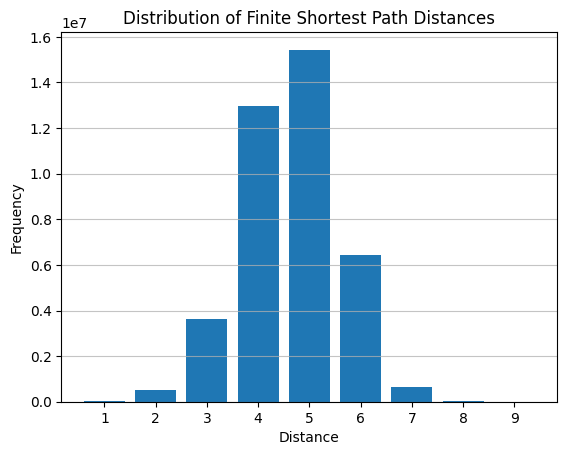


Running DBSCAN with eps=3, min_samples=4

Cluster Labels (sample):
Node 0: Cluster 0
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 0
Node 6: Cluster 0
Node 7: Cluster 0
Node 8: Cluster 0
Node 9: Cluster 0
Node 10: Cluster 0
Node 703: Cluster 0
Node 826: Cluster 0
Node 1097: Cluster 0
Node 1287: Cluster 0
Node 1591: Cluster 0
Node 1895: Cluster 0
Node 1896: Cluster 0
Node 1897: Cluster 0
Node 1898: Cluster 0

Cluster Sizes:
Cluster 0: 6299 nodes
Noise (-1): 2 nodes


In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 1. Read the edge list and build the graph
edges = []
with open('p2p-Gnutella08.txt') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        u, v = map(int, line.strip().split())
        edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# --- Added Connected Components Check ---
print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")
print(f"Number of connected components: {nx.number_connected_components(G)}")
components = list(nx.connected_components(G))
component_sizes = sorted([len(c) for c in components], reverse=True)
print(f"Sizes of connected components (largest first): {component_sizes}")

# If the largest component is close to the total number of nodes,
# DBSCAN will primarily cluster within this large component.
# ---------------------------------------


# 2. List of nodes (for consistent ordering)
nodes = list(G.nodes())
node_idx = {node: idx for idx, node in enumerate(nodes)}

# 3. Compute shortest-path distance matrix
N = len(nodes)
dist_matrix = np.full((N, N), np.inf)
np.fill_diagonal(dist_matrix, 0)

# It's generally better to compute shortest paths for the entire graph
# if memory allows, or use a large enough cutoff if dealing with components.
# cutoff=None would compute all-pairs shortest paths, but can be very slow/memory intensive.
# If components are small, or you want to cluster within a certain distance, cutoff is useful.
# If cutoff is too small, you might miss connections within a large component.
# Using a larger cutoff might be necessary if you expect larger clusters.
cutoff = 10 # Adjusted cutoff
for source in nodes:
    # Compute lengths for nodes reachable within the cutoff
    lengths = nx.single_source_shortest_path_length(G, source, cutoff=cutoff)
    for target, d in lengths.items():
        if target in node_idx: # Ensure target node is in our consistent list (should be, but safety check)
            i, j = node_idx[source], node_idx[target]
            dist_matrix[i, j] = d

# 4. Handle infinite distances before running DBSCAN
# Analyze the distribution of finite distances
finite_distances = dist_matrix[np.isfinite(dist_matrix) & (dist_matrix > 0)]

# Handle case where there are no finite distances > 0 (e.g., isolated nodes or very small components)
if finite_distances.size > 0:
    min_finite_nonzero = np.min(finite_distances)
    max_finite = np.max(finite_distances)
    median_finite = np.median(finite_distances)
    mean_finite = np.mean(finite_distances)

    print(f"\nFinite Shortest Path Distance Statistics:")
    print(f"Minimum finite non-zero distance: {min_finite_nonzero}")
    print(f"Maximum finite distance: {max_finite}")
    print(f"Median finite distance: {median_finite}")
    print(f"Mean finite distance: {mean_finite}")

    # Optional: Plot histogram of finite distances to help choose eps
    plt.hist(finite_distances, bins=np.arange(int(min_finite_nonzero), int(max_finite) + 2) - 0.5, rwidth=0.8)
    plt.title("Distribution of Finite Shortest Path Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(int(min_finite_nonzero), int(max_finite) + 1))
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Replace infinite values with a value larger than the maximum finite distance
    # This value will be outside the 'eps' neighborhood unless eps is set extremely high.
    large_distance = max_finite + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
else:
    print("\nNo finite non-zero distances found in the matrix.")
    # If no finite distances > 0, all nodes are likely isolated or in components of size 1.
    # Replacing inf with a value slightly larger than a minimal eps makes sense.
    eps = 1 # A minimal eps
    large_distance = eps + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
    # Adjust min_samples as well, maybe 1 to find isolated points as clusters if needed.
    min_samples = 1


# 5. Run DBSCAN on the distance matrix
# Based on the distance analysis and histogram:
# - Choose 'eps': Look for natural breaks or valleys in the histogram.
#   An 'eps' value where the frequency of distances drops significantly
#   might be a good candidate to separate clusters.
#   If most finite distances are small (e.g., 1, 2, 3), try eps = 1 or 2.
#   If finite distances go up to 10 or more, an eps of 2 might be too small,
#   but a large eps might connect everything in a large component.
# - Choose 'min_samples': How many neighbors must a point have to be a core point?
#   Lower values find sparser clusters. Higher values find denser clusters and mark more points as noise.
#   Start with a small value like 2 or 3 and increase if you get too many small clusters.

# Example adjustments (commented out - adjust based on your analysis!)
# eps = 1
# min_samples = 3

# Use your chosen eps and min_samples here
eps = 3 # You might need to change this
min_samples = 4 # You might need to change this

print(f"\nRunning DBSCAN with eps={eps}, min_samples={min_samples}")
db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
labels = db.fit_predict(dist_matrix)

# 6. Output: node ID and its cluster label
print("\nCluster Labels (sample):")
# Print only the first few nodes and their labels
for i, (node, label) in enumerate(zip(nodes, labels)):
    if i < 20: # Print labels for first 20 nodes
        print(f'Node {node}: Cluster {label}')
    else:
        break

# Print the number of nodes in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)
print("\nCluster Sizes:")
sorted_counts_indices = np.argsort(counts)[::-1] # Sort by count, descending
for i in sorted_counts_indices:
    label = unique_labels[i]
    count = counts[i]
    if label == -1:
        print(f"Noise (-1): {count} nodes")
    else:
        print(f"Cluster {label}: {count} nodes")

Number of nodes in the graph: 6301
Number of edges in the graph: 20777
Number of connected components: 2
Sizes of connected components (largest first): [6299, 2]

Finite Shortest Path Distance Statistics:
Minimum finite non-zero distance: 1.0
Maximum finite distance: 9.0
Median finite distance: 5.0
Mean finite distance: 4.642991785658397


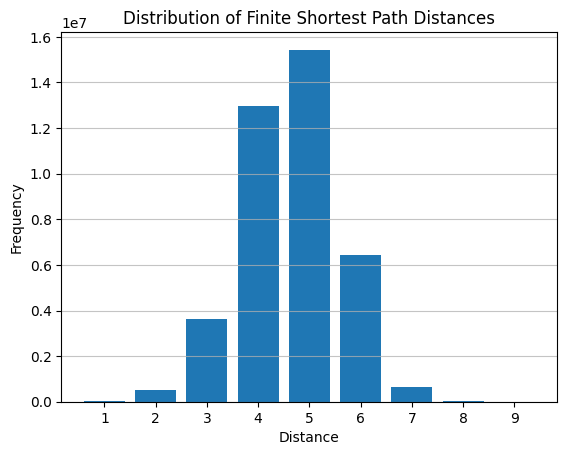


Running DBSCAN with eps=4, min_samples=2

Cluster Labels (sample):
Node 0: Cluster 0
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 0
Node 6: Cluster 0
Node 7: Cluster 0
Node 8: Cluster 0
Node 9: Cluster 0
Node 10: Cluster 0
Node 703: Cluster 0
Node 826: Cluster 0
Node 1097: Cluster 0
Node 1287: Cluster 0
Node 1591: Cluster 0
Node 1895: Cluster 0
Node 1896: Cluster 0
Node 1897: Cluster 0
Node 1898: Cluster 0

Cluster Sizes:
Cluster 0: 6299 nodes
Cluster 1: 2 nodes


In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 1. Read the edge list and build the graph
edges = []
with open('p2p-Gnutella08.txt') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        u, v = map(int, line.strip().split())
        edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# --- Added Connected Components Check ---
print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")
print(f"Number of connected components: {nx.number_connected_components(G)}")
components = list(nx.connected_components(G))
component_sizes = sorted([len(c) for c in components], reverse=True)
print(f"Sizes of connected components (largest first): {component_sizes}")

# If the largest component is close to the total number of nodes,
# DBSCAN will primarily cluster within this large component.
# ---------------------------------------


# 2. List of nodes (for consistent ordering)
nodes = list(G.nodes())
node_idx = {node: idx for idx, node in enumerate(nodes)}

# 3. Compute shortest-path distance matrix
N = len(nodes)
dist_matrix = np.full((N, N), np.inf)
np.fill_diagonal(dist_matrix, 0)

# It's generally better to compute shortest paths for the entire graph
# if memory allows, or use a large enough cutoff if dealing with components.
# cutoff=None would compute all-pairs shortest paths, but can be very slow/memory intensive.
# If components are small, or you want to cluster within a certain distance, cutoff is useful.
# If cutoff is too small, you might miss connections within a large component.
# Using a larger cutoff might be necessary if you expect larger clusters.
cutoff = 10 # Adjusted cutoff
for source in nodes:
    # Compute lengths for nodes reachable within the cutoff
    lengths = nx.single_source_shortest_path_length(G, source, cutoff=cutoff)
    for target, d in lengths.items():
        if target in node_idx: # Ensure target node is in our consistent list (should be, but safety check)
            i, j = node_idx[source], node_idx[target]
            dist_matrix[i, j] = d

# 4. Handle infinite distances before running DBSCAN
# Analyze the distribution of finite distances
finite_distances = dist_matrix[np.isfinite(dist_matrix) & (dist_matrix > 0)]

# Handle case where there are no finite distances > 0 (e.g., isolated nodes or very small components)
if finite_distances.size > 0:
    min_finite_nonzero = np.min(finite_distances)
    max_finite = np.max(finite_distances)
    median_finite = np.median(finite_distances)
    mean_finite = np.mean(finite_distances)

    print(f"\nFinite Shortest Path Distance Statistics:")
    print(f"Minimum finite non-zero distance: {min_finite_nonzero}")
    print(f"Maximum finite distance: {max_finite}")
    print(f"Median finite distance: {median_finite}")
    print(f"Mean finite distance: {mean_finite}")

    # Optional: Plot histogram of finite distances to help choose eps
    plt.hist(finite_distances, bins=np.arange(int(min_finite_nonzero), int(max_finite) + 2) - 0.5, rwidth=0.8)
    plt.title("Distribution of Finite Shortest Path Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(int(min_finite_nonzero), int(max_finite) + 1))
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Replace infinite values with a value larger than the maximum finite distance
    # This value will be outside the 'eps' neighborhood unless eps is set extremely high.
    large_distance = max_finite + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
else:
    print("\nNo finite non-zero distances found in the matrix.")
    # If no finite distances > 0, all nodes are likely isolated or in components of size 1.
    # Replacing inf with a value slightly larger than a minimal eps makes sense.
    eps = 1 # A minimal eps
    large_distance = eps + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
    # Adjust min_samples as well, maybe 1 to find isolated points as clusters if needed.
    min_samples = 1


# 5. Run DBSCAN on the distance matrix
# Based on the distance analysis and histogram:
# - Choose 'eps': Look for natural breaks or valleys in the histogram.
#   An 'eps' value where the frequency of distances drops significantly
#   might be a good candidate to separate clusters.
#   If most finite distances are small (e.g., 1, 2, 3), try eps = 1 or 2.
#   If finite distances go up to 10 or more, an eps of 2 might be too small,
#   but a large eps might connect everything in a large component.
# - Choose 'min_samples': How many neighbors must a point have to be a core point?
#   Lower values find sparser clusters. Higher values find denser clusters and mark more points as noise.
#   Start with a small value like 2 or 3 and increase if you get too many small clusters.

# Example adjustments (commented out - adjust based on your analysis!)
# eps = 1
# min_samples = 3

# Use your chosen eps and min_samples here
eps = 4 # You might need to change this
min_samples = 2 # You might need to change this

print(f"\nRunning DBSCAN with eps={eps}, min_samples={min_samples}")
db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
labels = db.fit_predict(dist_matrix)

# 6. Output: node ID and its cluster label
print("\nCluster Labels (sample):")
# Print only the first few nodes and their labels
for i, (node, label) in enumerate(zip(nodes, labels)):
    if i < 20: # Print labels for first 20 nodes
        print(f'Node {node}: Cluster {label}')
    else:
        break

# Print the number of nodes in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)
print("\nCluster Sizes:")
sorted_counts_indices = np.argsort(counts)[::-1] # Sort by count, descending
for i in sorted_counts_indices:
    label = unique_labels[i]
    count = counts[i]
    if label == -1:
        print(f"Noise (-1): {count} nodes")
    else:
        print(f"Cluster {label}: {count} nodes")

Number of nodes in the graph: 6301
Number of edges in the graph: 20777
Number of connected components: 2
Sizes of connected components (largest first): [6299, 2]

Finite Shortest Path Distance Statistics:
Minimum finite non-zero distance: 1.0
Maximum finite distance: 9.0
Median finite distance: 5.0
Mean finite distance: 4.642991785658397


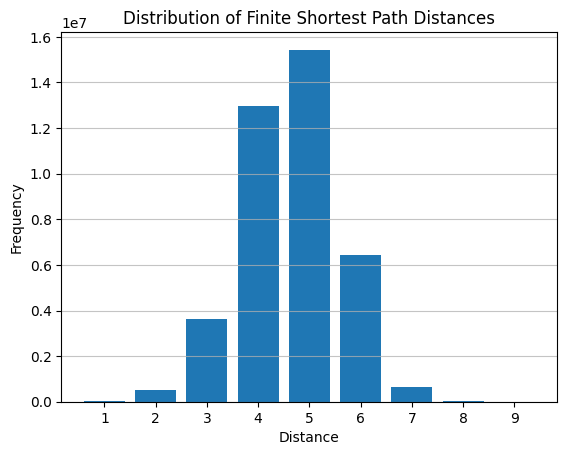


Running DBSCAN with eps=1, min_samples=2

Cluster Labels (sample):
Node 0: Cluster 0
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 0
Node 6: Cluster 0
Node 7: Cluster 0
Node 8: Cluster 0
Node 9: Cluster 0
Node 10: Cluster 0
Node 703: Cluster 0
Node 826: Cluster 0
Node 1097: Cluster 0
Node 1287: Cluster 0
Node 1591: Cluster 0
Node 1895: Cluster 0
Node 1896: Cluster 0
Node 1897: Cluster 0
Node 1898: Cluster 0

Cluster Sizes:
Cluster 0: 6299 nodes
Cluster 1: 2 nodes


In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 1. Read the edge list and build the graph
edges = []
with open('p2p-Gnutella08.txt') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        u, v = map(int, line.strip().split())
        edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# --- Added Connected Components Check ---
print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")
print(f"Number of connected components: {nx.number_connected_components(G)}")
components = list(nx.connected_components(G))
component_sizes = sorted([len(c) for c in components], reverse=True)
print(f"Sizes of connected components (largest first): {component_sizes}")

# If the largest component is close to the total number of nodes,
# DBSCAN will primarily cluster within this large component.
# ---------------------------------------


# 2. List of nodes (for consistent ordering)
nodes = list(G.nodes())
node_idx = {node: idx for idx, node in enumerate(nodes)}

# 3. Compute shortest-path distance matrix
N = len(nodes)
dist_matrix = np.full((N, N), np.inf)
np.fill_diagonal(dist_matrix, 0)

# It's generally better to compute shortest paths for the entire graph
# if memory allows, or use a large enough cutoff if dealing with components.
# cutoff=None would compute all-pairs shortest paths, but can be very slow/memory intensive.
# If components are small, or you want to cluster within a certain distance, cutoff is useful.
# If cutoff is too small, you might miss connections within a large component.
# Using a larger cutoff might be necessary if you expect larger clusters.
cutoff = 10 # Adjusted cutoff
for source in nodes:
    # Compute lengths for nodes reachable within the cutoff
    lengths = nx.single_source_shortest_path_length(G, source, cutoff=cutoff)
    for target, d in lengths.items():
        if target in node_idx: # Ensure target node is in our consistent list (should be, but safety check)
            i, j = node_idx[source], node_idx[target]
            dist_matrix[i, j] = d

# 4. Handle infinite distances before running DBSCAN
# Analyze the distribution of finite distances
finite_distances = dist_matrix[np.isfinite(dist_matrix) & (dist_matrix > 0)]

# Handle case where there are no finite distances > 0 (e.g., isolated nodes or very small components)
if finite_distances.size > 0:
    min_finite_nonzero = np.min(finite_distances)
    max_finite = np.max(finite_distances)
    median_finite = np.median(finite_distances)
    mean_finite = np.mean(finite_distances)

    print(f"\nFinite Shortest Path Distance Statistics:")
    print(f"Minimum finite non-zero distance: {min_finite_nonzero}")
    print(f"Maximum finite distance: {max_finite}")
    print(f"Median finite distance: {median_finite}")
    print(f"Mean finite distance: {mean_finite}")

    # Optional: Plot histogram of finite distances to help choose eps
    plt.hist(finite_distances, bins=np.arange(int(min_finite_nonzero), int(max_finite) + 2) - 0.5, rwidth=0.8)
    plt.title("Distribution of Finite Shortest Path Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(int(min_finite_nonzero), int(max_finite) + 1))
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Replace infinite values with a value larger than the maximum finite distance
    # This value will be outside the 'eps' neighborhood unless eps is set extremely high.
    large_distance = max_finite + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
else:
    print("\nNo finite non-zero distances found in the matrix.")
    # If no finite distances > 0, all nodes are likely isolated or in components of size 1.
    # Replacing inf with a value slightly larger than a minimal eps makes sense.
    eps = 1 # A minimal eps
    large_distance = eps + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
    # Adjust min_samples as well, maybe 1 to find isolated points as clusters if needed.
    min_samples = 1


# 5. Run DBSCAN on the distance matrix
# Based on the distance analysis and histogram:
# - Choose 'eps': Look for natural breaks or valleys in the histogram.
#   An 'eps' value where the frequency of distances drops significantly
#   might be a good candidate to separate clusters.
#   If most finite distances are small (e.g., 1, 2, 3), try eps = 1 or 2.
#   If finite distances go up to 10 or more, an eps of 2 might be too small,
#   but a large eps might connect everything in a large component.
# - Choose 'min_samples': How many neighbors must a point have to be a core point?
#   Lower values find sparser clusters. Higher values find denser clusters and mark more points as noise.
#   Start with a small value like 2 or 3 and increase if you get too many small clusters.

# Example adjustments (commented out - adjust based on your analysis!)
# eps = 1
# min_samples = 3

# Use your chosen eps and min_samples here
eps = 1 # You might need to change this
min_samples = 2 # You might need to change this

print(f"\nRunning DBSCAN with eps={eps}, min_samples={min_samples}")
db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
labels = db.fit_predict(dist_matrix)

# 6. Output: node ID and its cluster label
print("\nCluster Labels (sample):")
# Print only the first few nodes and their labels
for i, (node, label) in enumerate(zip(nodes, labels)):
    if i < 20: # Print labels for first 20 nodes
        print(f'Node {node}: Cluster {label}')
    else:
        break

# Print the number of nodes in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)
print("\nCluster Sizes:")
sorted_counts_indices = np.argsort(counts)[::-1] # Sort by count, descending
for i in sorted_counts_indices:
    label = unique_labels[i]
    count = counts[i]
    if label == -1:
        print(f"Noise (-1): {count} nodes")
    else:
        print(f"Cluster {label}: {count} nodes")

Number of nodes in the graph: 6301
Number of edges in the graph: 20777
Number of connected components: 2
Sizes of connected components (largest first): [6299, 2]

Finite Shortest Path Distance Statistics:
Minimum finite non-zero distance: 1.0
Maximum finite distance: 9.0
Median finite distance: 5.0
Mean finite distance: 4.642991785658397


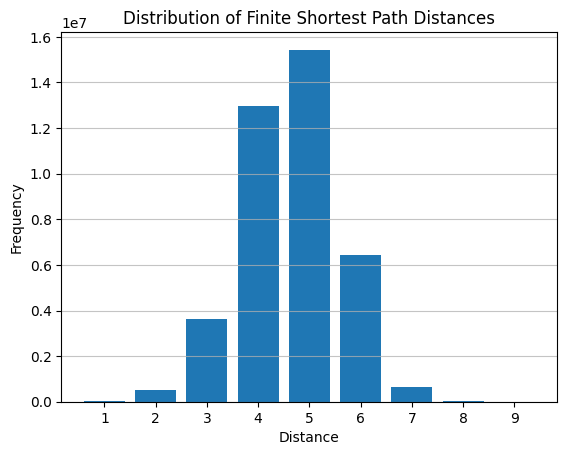


Running DBSCAN with eps=1, min_samples=15

Cluster Labels (sample):
Node 0: Cluster 0
Node 1: Cluster -1
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 0
Node 6: Cluster -1
Node 7: Cluster 0
Node 8: Cluster 0
Node 9: Cluster 0
Node 10: Cluster 0
Node 703: Cluster 0
Node 826: Cluster 0
Node 1097: Cluster 0
Node 1287: Cluster 0
Node 1591: Cluster 0
Node 1895: Cluster 0
Node 1896: Cluster 0
Node 1897: Cluster 0
Node 1898: Cluster 0

Cluster Sizes:
Cluster 0: 4132 nodes
Noise (-1): 2125 nodes
Cluster 6: 11 nodes
Cluster 7: 8 nodes
Cluster 2: 7 nodes
Cluster 4: 6 nodes
Cluster 5: 5 nodes
Cluster 1: 4 nodes
Cluster 3: 3 nodes


In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 1. Read the edge list and build the graph
edges = []
with open('p2p-Gnutella08.txt') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        u, v = map(int, line.strip().split())
        edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# --- Added Connected Components Check ---
print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")
print(f"Number of connected components: {nx.number_connected_components(G)}")
components = list(nx.connected_components(G))
component_sizes = sorted([len(c) for c in components], reverse=True)
print(f"Sizes of connected components (largest first): {component_sizes}")

# If the largest component is close to the total number of nodes,
# DBSCAN will primarily cluster within this large component.
# ---------------------------------------


# 2. List of nodes (for consistent ordering)
nodes = list(G.nodes())
node_idx = {node: idx for idx, node in enumerate(nodes)}

# 3. Compute shortest-path distance matrix
N = len(nodes)
dist_matrix = np.full((N, N), np.inf)
np.fill_diagonal(dist_matrix, 0)

# It's generally better to compute shortest paths for the entire graph
# if memory allows, or use a large enough cutoff if dealing with components.
# cutoff=None would compute all-pairs shortest paths, but can be very slow/memory intensive.
# If components are small, or you want to cluster within a certain distance, cutoff is useful.
# If cutoff is too small, you might miss connections within a large component.
# Using a larger cutoff might be necessary if you expect larger clusters.
cutoff = 10 # Adjusted cutoff
for source in nodes:
    # Compute lengths for nodes reachable within the cutoff
    lengths = nx.single_source_shortest_path_length(G, source, cutoff=cutoff)
    for target, d in lengths.items():
        if target in node_idx: # Ensure target node is in our consistent list (should be, but safety check)
            i, j = node_idx[source], node_idx[target]
            dist_matrix[i, j] = d

# 4. Handle infinite distances before running DBSCAN
# Analyze the distribution of finite distances
finite_distances = dist_matrix[np.isfinite(dist_matrix) & (dist_matrix > 0)]

# Handle case where there are no finite distances > 0 (e.g., isolated nodes or very small components)
if finite_distances.size > 0:
    min_finite_nonzero = np.min(finite_distances)
    max_finite = np.max(finite_distances)
    median_finite = np.median(finite_distances)
    mean_finite = np.mean(finite_distances)

    print(f"\nFinite Shortest Path Distance Statistics:")
    print(f"Minimum finite non-zero distance: {min_finite_nonzero}")
    print(f"Maximum finite distance: {max_finite}")
    print(f"Median finite distance: {median_finite}")
    print(f"Mean finite distance: {mean_finite}")

    # Optional: Plot histogram of finite distances to help choose eps
    plt.hist(finite_distances, bins=np.arange(int(min_finite_nonzero), int(max_finite) + 2) - 0.5, rwidth=0.8)
    plt.title("Distribution of Finite Shortest Path Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(int(min_finite_nonzero), int(max_finite) + 1))
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Replace infinite values with a value larger than the maximum finite distance
    # This value will be outside the 'eps' neighborhood unless eps is set extremely high.
    large_distance = max_finite + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
else:
    print("\nNo finite non-zero distances found in the matrix.")
    # If no finite distances > 0, all nodes are likely isolated or in components of size 1.
    # Replacing inf with a value slightly larger than a minimal eps makes sense.
    eps = 1 # A minimal eps
    large_distance = eps + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
    # Adjust min_samples as well, maybe 1 to find isolated points as clusters if needed.
    min_samples = 1


# 5. Run DBSCAN on the distance matrix
# Based on the distance analysis and histogram:
# - Choose 'eps': Look for natural breaks or valleys in the histogram.
#   An 'eps' value where the frequency of distances drops significantly
#   might be a good candidate to separate clusters.
#   If most finite distances are small (e.g., 1, 2, 3), try eps = 1 or 2.
#   If finite distances go up to 10 or more, an eps of 2 might be too small,
#   but a large eps might connect everything in a large component.
# - Choose 'min_samples': How many neighbors must a point have to be a core point?
#   Lower values find sparser clusters. Higher values find denser clusters and mark more points as noise.
#   Start with a small value like 2 or 3 and increase if you get too many small clusters.

# Example adjustments (commented out - adjust based on your analysis!)
# eps = 1
# min_samples = 3

# Use your chosen eps and min_samples here
eps = 1 # You might need to change this
min_samples = 15 # You might need to change this

print(f"\nRunning DBSCAN with eps={eps}, min_samples={min_samples}")
db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
labels = db.fit_predict(dist_matrix)

# 6. Output: node ID and its cluster label
print("\nCluster Labels (sample):")
# Print only the first few nodes and their labels
for i, (node, label) in enumerate(zip(nodes, labels)):
    if i < 20: # Print labels for first 20 nodes
        print(f'Node {node}: Cluster {label}')
    else:
        break

# Print the number of nodes in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)
print("\nCluster Sizes:")
sorted_counts_indices = np.argsort(counts)[::-1] # Sort by count, descending
for i in sorted_counts_indices:
    label = unique_labels[i]
    count = counts[i]
    if label == -1:
        print(f"Noise (-1): {count} nodes")
    else:
        print(f"Cluster {label}: {count} nodes")

Number of nodes in the graph: 6301
Number of edges in the graph: 20777
Number of connected components: 2
Sizes of connected components (largest first): [6299, 2]

Finite Shortest Path Distance Statistics:
Minimum finite non-zero distance: 1.0
Maximum finite distance: 9.0
Median finite distance: 5.0
Mean finite distance: 4.642991785658397


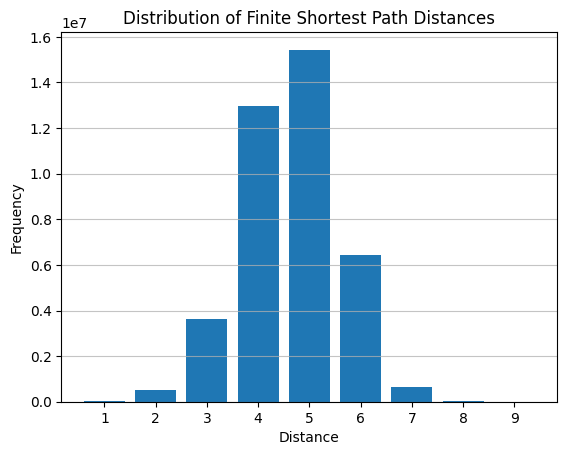


Running DBSCAN with eps=1, min_samples=11

Cluster Labels (sample):
Node 0: Cluster 0
Node 1: Cluster 0
Node 2: Cluster 0
Node 3: Cluster 0
Node 4: Cluster 0
Node 5: Cluster 0
Node 6: Cluster 0
Node 7: Cluster 0
Node 8: Cluster 0
Node 9: Cluster 0
Node 10: Cluster 0
Node 703: Cluster 0
Node 826: Cluster 0
Node 1097: Cluster 0
Node 1287: Cluster 0
Node 1591: Cluster 0
Node 1895: Cluster 0
Node 1896: Cluster 0
Node 1897: Cluster 0
Node 1898: Cluster 0

Cluster Sizes:
Cluster 0: 6155 nodes
Noise (-1): 141 nodes
Cluster 1: 3 nodes
Cluster 2: 2 nodes


In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 1. Read the edge list and build the graph
edges = []
with open('p2p-Gnutella08.txt') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        u, v = map(int, line.strip().split())
        edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# --- Added Connected Components Check ---
print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")
print(f"Number of connected components: {nx.number_connected_components(G)}")
components = list(nx.connected_components(G))
component_sizes = sorted([len(c) for c in components], reverse=True)
print(f"Sizes of connected components (largest first): {component_sizes}")

# If the largest component is close to the total number of nodes,
# DBSCAN will primarily cluster within this large component.
# ---------------------------------------


# 2. List of nodes (for consistent ordering)
nodes = list(G.nodes())
node_idx = {node: idx for idx, node in enumerate(nodes)}

# 3. Compute shortest-path distance matrix
N = len(nodes)
dist_matrix = np.full((N, N), np.inf)
np.fill_diagonal(dist_matrix, 0)

# It's generally better to compute shortest paths for the entire graph
# if memory allows, or use a large enough cutoff if dealing with components.
# cutoff=None would compute all-pairs shortest paths, but can be very slow/memory intensive.
# If components are small, or you want to cluster within a certain distance, cutoff is useful.
# If cutoff is too small, you might miss connections within a large component.
# Using a larger cutoff might be necessary if you expect larger clusters.
cutoff = 10 # Adjusted cutoff
for source in nodes:
    # Compute lengths for nodes reachable within the cutoff
    lengths = nx.single_source_shortest_path_length(G, source, cutoff=cutoff)
    for target, d in lengths.items():
        if target in node_idx: # Ensure target node is in our consistent list (should be, but safety check)
            i, j = node_idx[source], node_idx[target]
            dist_matrix[i, j] = d

# 4. Handle infinite distances before running DBSCAN
# Analyze the distribution of finite distances
finite_distances = dist_matrix[np.isfinite(dist_matrix) & (dist_matrix > 0)]

# Handle case where there are no finite distances > 0 (e.g., isolated nodes or very small components)
if finite_distances.size > 0:
    min_finite_nonzero = np.min(finite_distances)
    max_finite = np.max(finite_distances)
    median_finite = np.median(finite_distances)
    mean_finite = np.mean(finite_distances)

    print(f"\nFinite Shortest Path Distance Statistics:")
    print(f"Minimum finite non-zero distance: {min_finite_nonzero}")
    print(f"Maximum finite distance: {max_finite}")
    print(f"Median finite distance: {median_finite}")
    print(f"Mean finite distance: {mean_finite}")

    # Optional: Plot histogram of finite distances to help choose eps
    plt.hist(finite_distances, bins=np.arange(int(min_finite_nonzero), int(max_finite) + 2) - 0.5, rwidth=0.8)
    plt.title("Distribution of Finite Shortest Path Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(int(min_finite_nonzero), int(max_finite) + 1))
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Replace infinite values with a value larger than the maximum finite distance
    # This value will be outside the 'eps' neighborhood unless eps is set extremely high.
    large_distance = max_finite + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
else:
    print("\nNo finite non-zero distances found in the matrix.")
    # If no finite distances > 0, all nodes are likely isolated or in components of size 1.
    # Replacing inf with a value slightly larger than a minimal eps makes sense.
    eps = 1 # A minimal eps
    large_distance = eps + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
    # Adjust min_samples as well, maybe 1 to find isolated points as clusters if needed.
    min_samples = 1


# 5. Run DBSCAN on the distance matrix
# Based on the distance analysis and histogram:
# - Choose 'eps': Look for natural breaks or valleys in the histogram.
#   An 'eps' value where the frequency of distances drops significantly
#   might be a good candidate to separate clusters.
#   If most finite distances are small (e.g., 1, 2, 3), try eps = 1 or 2.
#   If finite distances go up to 10 or more, an eps of 2 might be too small,
#   but a large eps might connect everything in a large component.
# - Choose 'min_samples': How many neighbors must a point have to be a core point?
#   Lower values find sparser clusters. Higher values find denser clusters and mark more points as noise.
#   Start with a small value like 2 or 3 and increase if you get too many small clusters.

# Example adjustments (commented out - adjust based on your analysis!)
# eps = 1
# min_samples = 3

# Use your chosen eps and min_samples here
eps = 1 # You might need to change this
min_samples = 11 # You might need to change this

print(f"\nRunning DBSCAN with eps={eps}, min_samples={min_samples}")
db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
labels = db.fit_predict(dist_matrix)

# 6. Output: node ID and its cluster label
print("\nCluster Labels (sample):")
# Print only the first few nodes and their labels
for i, (node, label) in enumerate(zip(nodes, labels)):
    if i < 20: # Print labels for first 20 nodes
        print(f'Node {node}: Cluster {label}')
    else:
        break

# Print the number of nodes in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)
print("\nCluster Sizes:")
sorted_counts_indices = np.argsort(counts)[::-1] # Sort by count, descending
for i in sorted_counts_indices:
    label = unique_labels[i]
    count = counts[i]
    if label == -1:
        print(f"Noise (-1): {count} nodes")
    else:
        print(f"Cluster {label}: {count} nodes")

In [ ]:
import numpy as np
import networkx as nx
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# 1. Read the edge list and build the graph
edges = []
with open('roadNet-PA.txt') as f:
    for line in f:
        if line.startswith('#') or line.strip() == '':
            continue
        u, v = map(int, line.strip().split())
        edges.append((u, v))

G = nx.Graph()
G.add_edges_from(edges)

# --- Added Connected Components Check ---
print(f"Number of nodes in the graph: {G.number_of_nodes()}")
print(f"Number of edges in the graph: {G.number_of_edges()}")
print(f"Number of connected components: {nx.number_connected_components(G)}")
components = list(nx.connected_components(G))
component_sizes = sorted([len(c) for c in components], reverse=True)
print(f"Sizes of connected components (largest first): {component_sizes}")

# If the largest component is close to the total number of nodes,
# DBSCAN will primarily cluster within this large component.
# ---------------------------------------


# 2. List of nodes (for consistent ordering)
nodes = list(G.nodes())
node_idx = {node: idx for idx, node in enumerate(nodes)}

# 3. Compute shortest-path distance matrix
N = len(nodes)
dist_matrix = np.full((N, N), np.inf)
np.fill_diagonal(dist_matrix, 0)

# It's generally better to compute shortest paths for the entire graph
# if memory allows, or use a large enough cutoff if dealing with components.
# cutoff=None would compute all-pairs shortest paths, but can be very slow/memory intensive.
# If components are small, or you want to cluster within a certain distance, cutoff is useful.
# If cutoff is too small, you might miss connections within a large component.
# Using a larger cutoff might be necessary if you expect larger clusters.
cutoff = 10 # Adjusted cutoff
for source in nodes:
    # Compute lengths for nodes reachable within the cutoff
    lengths = nx.single_source_shortest_path_length(G, source, cutoff=cutoff)
    for target, d in lengths.items():
        if target in node_idx: # Ensure target node is in our consistent list (should be, but safety check)
            i, j = node_idx[source], node_idx[target]
            dist_matrix[i, j] = d

# 4. Handle infinite distances before running DBSCAN
# Analyze the distribution of finite distances
finite_distances = dist_matrix[np.isfinite(dist_matrix) & (dist_matrix > 0)]

# Handle case where there are no finite distances > 0 (e.g., isolated nodes or very small components)
if finite_distances.size > 0:
    min_finite_nonzero = np.min(finite_distances)
    max_finite = np.max(finite_distances)
    median_finite = np.median(finite_distances)
    mean_finite = np.mean(finite_distances)

    print(f"\nFinite Shortest Path Distance Statistics:")
    print(f"Minimum finite non-zero distance: {min_finite_nonzero}")
    print(f"Maximum finite distance: {max_finite}")
    print(f"Median finite distance: {median_finite}")
    print(f"Mean finite distance: {mean_finite}")

    # Optional: Plot histogram of finite distances to help choose eps
    plt.hist(finite_distances, bins=np.arange(int(min_finite_nonzero), int(max_finite) + 2) - 0.5, rwidth=0.8)
    plt.title("Distribution of Finite Shortest Path Distances")
    plt.xlabel("Distance")
    plt.ylabel("Frequency")
    plt.xticks(np.arange(int(min_finite_nonzero), int(max_finite) + 1))
    plt.grid(axis='y', alpha=0.75)
    plt.show()

    # Replace infinite values with a value larger than the maximum finite distance
    # This value will be outside the 'eps' neighborhood unless eps is set extremely high.
    large_distance = max_finite + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
else:
    print("\nNo finite non-zero distances found in the matrix.")
    # If no finite distances > 0, all nodes are likely isolated or in components of size 1.
    # Replacing inf with a value slightly larger than a minimal eps makes sense.
    eps = 1 # A minimal eps
    large_distance = eps + 1
    dist_matrix[dist_matrix == np.inf] = large_distance
    # Adjust min_samples as well, maybe 1 to find isolated points as clusters if needed.
    min_samples = 1


# 5. Run DBSCAN on the distance matrix
# Based on the distance analysis and histogram:
# - Choose 'eps': Look for natural breaks or valleys in the histogram.
#   An 'eps' value where the frequency of distances drops significantly
#   might be a good candidate to separate clusters.
#   If most finite distances are small (e.g., 1, 2, 3), try eps = 1 or 2.
#   If finite distances go up to 10 or more, an eps of 2 might be too small,
#   but a large eps might connect everything in a large component.
# - Choose 'min_samples': How many neighbors must a point have to be a core point?
#   Lower values find sparser clusters. Higher values find denser clusters and mark more points as noise.
#   Start with a small value like 2 or 3 and increase if you get too many small clusters.

# Example adjustments (commented out - adjust based on your analysis!)
# eps = 1
# min_samples = 3

# Use your chosen eps and min_samples here
eps = 1 # You might need to change this
min_samples = 10 # You might need to change this

print(f"\nRunning DBSCAN with eps={eps}, min_samples={min_samples}")
db = DBSCAN(eps=eps, min_samples=min_samples, metric='precomputed')
labels = db.fit_predict(dist_matrix)

# 6. Output: node ID and its cluster label
print("\nCluster Labels (sample):")
# Print only the first few nodes and their labels
for i, (node, label) in enumerate(zip(nodes, labels)):
    if i < 20: # Print labels for first 20 nodes
        print(f'Node {node}: Cluster {label}')
    else:
        break

# Print the number of nodes in each cluster
unique_labels, counts = np.unique(labels, return_counts=True)
print("\nCluster Sizes:")
sorted_counts_indices = np.argsort(counts)[::-1] # Sort by count, descending
for i in sorted_counts_indices:
    label = unique_labels[i]
    count = counts[i]
    if label == -1:
        print(f"Noise (-1): {count} nodes")
    else:
        print(f"Cluster {label}: {count} nodes")

Number of nodes in the graph: 1088092
Number of edges in the graph: 1541898
Number of connected components: 206
Sizes of connected components (largest first): [1087562, 19, 14, 12, 12, 7, 7, 6, 6, 6, 5, 5, 5, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
import networkx as nx

# Load your graph (example: edge list file)
G = nx.read_edgelist('p2p-Gnutella08.txt', nodetype=int, create_using=nx.DiGraph())  # or nx.Graph() for roadNet-PA

k = 5  # Number of nearest neighbors

# Compute kNN for each node using shortest path length
knn_dict = {}
for node in G.nodes:
    lengths = nx.single_source_shortest_path_length(G, node)
    # Remove self and sort by distance, then node ID
    neighbors = sorted([(n, d) for n, d in lengths.items() if n != node], key=lambda x: (x[1], x[0]))
    knn_dict[node] = [n for n, d in neighbors[:k]]

# Example: print kNN for node 0
print(f"kNN for node 0: {knn_dict.get(0, [])}")


kNN for node 0: [1, 2, 3, 4, 5]


In [ ]:
!pip install node2vec

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 88.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 121.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 17.5 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tsfresh 0.21.0 requires scipy>=1.14.0; python_version >= "3.10", but you have scipy 1.13.1 which is incompatible.
thinc 8.3.6 re

In [ ]:
import networkx as nx
from node2vec import Node2Vec
import numpy as np

# Load your graph
G = nx.read_edgelist('p2p-Gnutella08.txt', nodetype=int, create_using=nx.DiGraph())

# Generate node2vec embeddings
node2vec = Node2Vec(G, dimensions=16, walk_length=30, num_walks=200, workers=2)
model = node2vec.fit(window=10, min_count=1)

# Get embeddings as numpy array
nodes = sorted(G.nodes())
X = np.array([model.wv[str(node)] for node in nodes])

# Save embeddings for future use
np.save('node_embeddings.npy', X)


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [ ]:
import numpy as np
from sklearn.neighbors import NearestNeighbors

# X: numpy array of shape (num_nodes, embedding_dim)
# Each row is the embedding vector for a node
X = np.load('node_embeddings.npy')  # Replace with your embedding data

k = 5
nbrs = NearestNeighbors(n_neighbors=k+1, algorithm='auto').fit(X)
distances, indices = nbrs.kneighbors(X)

# indices[i, 1:] gives the k nearest neighbors for node i (excluding itself)
knn_dict = {i: list(row[1:]) for i, row in enumerate(indices)}

print(f"kNN for node 0: {knn_dict[0]}")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

# X: your node feature matrix (embeddings or other features)
k = 5
nbrs = NearestNeighbors(n_neighbors=k).fit(X)
distances, _ = nbrs.kneighbors(X)
knn_distances = np.sort(distances[:, k-1])

plt.plot(knn_distances)
plt.ylabel(f"{k}-NN distance")
plt.xlabel("Points sorted by distance")
plt.title("kNN Distance Plot")
plt.show()


In [ ]:
import networkx as nx

# Load your graph (example: edge list file)
G = nx.read_edgelist('roadNet-PA.txt', nodetype=int, create_using=nx.Graph())  # or nx.Graph() for roadNet-PA

k = 5  # Number of nearest neighbors

# Compute kNN for each node using shortest path length
knn_dict = {}
for node in G.nodes:
    lengths = nx.single_source_shortest_path_length(G, node)
    # Remove self and sort by distance, then node ID
    neighbors = sorted([(n, d) for n, d in lengths.items() if n != node], key=lambda x: (x[1], x[0]))
    knn_dict[node] = [n for n, d in neighbors[:k]]

# Example: print kNN for node 0
print(f"kNN for node 0: {knn_dict.get(0, [])}")


In [ ]:
import glob

def parse_clusters_from_section(lines, section_name):
    """Parse a section ('Full cluster' or 'Cluster with additional points') into a dict."""
    start = None
    for idx, line in enumerate(lines):
        if line.strip().startswith(section_name):
            start = idx
            break
    if start is None:
        raise ValueError(f"Section '{section_name}' not found.")

    # Find the end of the section
    end = len(lines)
    for idx in range(start+1, len(lines)):
        if lines[idx].strip() == "" or lines[idx].startswith("Partial cluster") or lines[idx].startswith("Cluster with additional points") or lines[idx].startswith("minPts:"):
            end = idx
            break

    # Parse lines, skipping headers and non-data lines
    clusters = {}
    for line in lines[start+1:end]:
        line = line.strip()
        if not line or line.lower().startswith("nodeid") or line.lower().startswith("qty"):
            continue  # Skip headers and metadata
        parts = line.split()
        if len(parts) != 2:
            continue
        try:
            node = int(parts[0])
            cluster = int(parts[1])
            clusters[node] = cluster
        except ValueError:
            continue  # Skip lines that can't be parsed

    return clusters

def file_accuracy(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    full = parse_clusters_from_section(lines, "Full cluster")
    addpoint = parse_clusters_from_section(lines, "Cluster with additional points")
    total = 0
    correct = 0
    for node, cluster in full.items():
        if node in addpoint and addpoint[node] == cluster:
            correct += 1
        total += 1
    accuracy = correct / total if total > 0 else 0
    return accuracy

# --- Main: Compute average accuracy for all matching files ---
file_pattern = "eps=1_minpts=5_*.txt"
file_list = glob.glob(file_pattern)

accuracies = []
for fname in file_list:
    acc = file_accuracy(fname)
    print(f"{fname}: accuracy = {acc:.4f}")
    accuracies.append(acc)

if accuracies:
    avg_accuracy = sum(accuracies) / len(accuracies)
    print(f"\nAverage accuracy across {len(accuracies)} files: {avg_accuracy:.4f} ({avg_accuracy*100:.2f}%)")
else:
    print("No files found matching the pattern.")


eps=1_minpts=5_3.txt: accuracy = 0.8437
eps=1_minpts=5_1.txt: accuracy = 0.8437
eps=1_minpts=5_2.txt: accuracy = 0.8437

Average accuracy across 3 files: 0.8437 (84.37%)


In [ ]:
import glob

def parse_clusters_from_section(lines, section_name):
    """Parse a section ('Full cluster' or 'Cluster with additional points') into a dict."""
    start = None
    for idx, line in enumerate(lines):
        if line.strip().startswith(section_name):
            start = idx
            break
    if start is None:
        raise ValueError(f"Section '{section_name}' not found.")

    # Find the end of the section
    end = len(lines)
    for idx in range(start+1, len(lines)):
        if lines[idx].strip() == "" or lines[idx].startswith("Partial cluster") or lines[idx].startswith("Cluster with additional points") or lines[idx].startswith("minPts:"):
            end = idx
            break

    # Parse lines, skipping headers and non-data lines
    clusters = {}
    for line in lines[start+1:end]:
        line = line.strip()
        if not line or line.lower().startswith("nodeid") or line.lower().startswith("qty"):
            continue  # Skip headers and metadata
        parts = line.split()
        if len(parts) != 2:
            continue
        try:
            node = int(parts[0])
            cluster = int(parts[1])
            clusters[node] = cluster
        except ValueError:
            continue  # Skip lines that can't be parsed

    return clusters

def file_accuracy(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    full = parse_clusters_from_section(lines, "Full cluster")
    addpoint = parse_clusters_from_section(lines, "Cluster with additional points")
    total = 0
    correct = 0
    for node, cluster in full.items():
        if node in addpoint and addpoint[node] == cluster:
            correct += 1
        total += 1
    accuracy = correct / total if total > 0 else 0
    return accuracy

# --- Main: Compute average accuracy for all matching files ---
file_pattern = "eps=1_minpts=2_*.txt"
file_list = glob.glob(file_pattern)

accuracies = []
for fname in file_list:
    acc = file_accuracy(fname)
    print(f"{fname}: accuracy = {acc:.4f}")
    accuracies.append(acc)

if accuracies:
    avg_accuracy = sum(accuracies) / len(accuracies)
    print(f"\nAverage accuracy across {len(accuracies)} files: {avg_accuracy:.4f} ({avg_accuracy*100:.2f}%)")
else:
    print("No files found matching the pattern.")


eps=1_minpts=2_3.txt: accuracy = 0.8478
eps=1_minpts=2_2.txt: accuracy = 0.8478
eps=1_minpts=2_1.txt: accuracy = 0.8478

Average accuracy across 3 files: 0.8478 (84.78%)


In [5]:
import glob

def parse_clusters_from_section(lines, section_name):
    """Parse a section ('Full cluster' or 'Cluster with additional points') into a dict."""
    start = None
    for idx, line in enumerate(lines):
        if line.strip().startswith(section_name):
            start = idx
            break
    if start is None:
        raise ValueError(f"Section '{section_name}' not found.")

    # Find the end of the section
    end = len(lines)
    for idx in range(start+1, len(lines)):
        if lines[idx].strip() == "" or lines[idx].startswith("Partial cluster") or lines[idx].startswith("Cluster with additional points") or lines[idx].startswith("minPts:"):
            end = idx
            break

    # Parse lines, skipping headers and non-data lines
    clusters = {}
    for line in lines[start+1:end]:
        line = line.strip()
        if not line or line.lower().startswith("nodeid") or line.lower().startswith("qty"):
            continue  # Skip headers and metadata
        parts = line.split()
        if len(parts) != 2:
            continue
        try:
            node = int(parts[0])
            cluster = int(parts[1])
            clusters[node] = cluster
        except ValueError:
            continue  # Skip lines that can't be parsed

    return clusters

def file_accuracy(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    full = parse_clusters_from_section(lines, "Full cluster")
    addpoint = parse_clusters_from_section(lines, "Cluster with additional points")
    total = 0
    correct = 0
    for node, cluster in full.items():
        if node in addpoint and addpoint[node] == cluster:
            correct += 1
        total += 1
    accuracy = correct / total if total > 0 else 0
    return accuracy

# --- Main: Compute average accuracy for all matching files ---
file_pattern = "eps=2_minpts=5_*.txt"
file_list = glob.glob(file_pattern)

accuracies = []
for fname in file_list:
    acc = file_accuracy(fname)
    print(f"{fname}: accuracy = {acc:.4f}")
    accuracies.append(acc)

if accuracies:
    avg_accuracy = sum(accuracies) / len(accuracies)
    print(f"\nAverage accuracy across {len(accuracies)} files: {avg_accuracy:.4f} ({avg_accuracy*100:.2f}%)")
else:
    print("No files found matching the pattern.")


eps=2_minpts=5_3.txt: accuracy = 0.9356
eps=2_minpts=5_2.txt: accuracy = 0.9356
eps=2_minpts=5_1.txt: accuracy = 0.9356

Average accuracy across 3 files: 0.9356 (93.56%)


In [6]:
import glob
import re
from collections import defaultdict

# Adjust your file pattern as needed
file_pattern = "eps=2_minpts=5_*.txt"
file_list = glob.glob(file_pattern)

# Labels to search for
time_labels = [
    'Full DBSCAN elapsed time',
    'Half DBSCAN elapsed time',
    'Add DBSCAN elapsed time'
]

# Store times for each label
time_results = defaultdict(list)

# Extract times from all files
for fname in file_list:
    with open(fname, 'r', encoding='utf-8') as f:
        lines = f.readlines()
    for label in time_labels:
        for line in lines:
            if label in line:
                match = re.search(r'(\d+)\s*ms', line)
                if match:
                    ms = int(match.group(1))
                    time_results[label].append(ms)

# Print values and averages for each label
for label in time_labels:
    values = time_results.get(label, [])
    if values:
        avg = sum(values) / len(values)
        print(f"{label}: values = {values}, average = {avg:.2f} ms")
    else:
        print(f"{label}: No data found")


Full DBSCAN elapsed time: values = [10682, 12330, 10545], average = 11185.67 ms
Half DBSCAN elapsed time: values = [4910, 5689, 5094], average = 5231.00 ms
Add DBSCAN elapsed time: values = [1071774, 1155669, 1284164], average = 1170535.67 ms
